Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [ ]:
data = pd.read_csv("creditcard.csv")


Check first rows

In [ ]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Dataset info

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

Check Class Imbalance

In [ ]:
data['Class'].value_counts()


,count
Class,
0.0,11906
1.0,52


Visualize

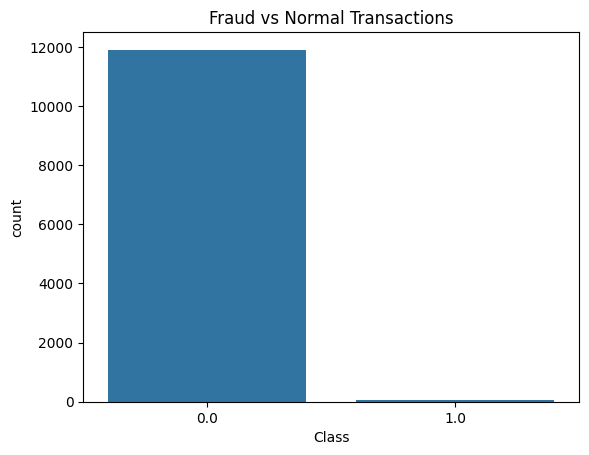

In [ ]:
sns.countplot(x='Class', data=data)
plt.title("Fraud vs Normal Transactions")
plt.show()


Separate Features and Target

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']


Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train-Test Split

In [ ]:
data.dropna(inplace=True)
X = data.drop('Class', axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

Gradient Boosting Classifier

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


Train Model

In [ ]:
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=150, random_state=42)

Predictions

In [ ]:
gb_pred = gb_model.predict(X_test)


Evaluate Gradient Boosting

In [ ]:
print("Gradient Boosting Accuracy:",
      accuracy_score(y_test, gb_pred))

print("Gradient Boosting ROC-AUC:",
      roc_auc_score(y_test, gb_pred))

print(classification_report(y_test, gb_pred))


Gradient Boosting Accuracy: 0.9989966555183947
Gradient Boosting ROC-AUC: 0.8846153846153846
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2977
         1.0       1.00      0.77      0.87        13

    accuracy                           1.00      2990
   macro avg       1.00      0.88      0.93      2990
weighted avg       1.00      1.00      1.00      2990



AdaBoost Classifier

In [ ]:
ada_model = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)


Train Model

In [ ]:
ada_model.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=42)

Predictions

In [ ]:
ada_pred = ada_model.predict(X_test)


Evaluate AdaBoost

In [ ]:
print("AdaBoost Accuracy:",
      accuracy_score(y_test, ada_pred))

print("AdaBoost ROC-AUC:",
      roc_auc_score(y_test, ada_pred))

print(classification_report(y_test, ada_pred))


AdaBoost Accuracy: 0.9993311036789297
AdaBoost ROC-AUC: 0.9230769230769231
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2977
         1.0       1.00      0.85      0.92        13

    accuracy                           1.00      2990
   macro avg       1.00      0.92      0.96      2990
weighted avg       1.00      1.00      1.00      2990



Confusion Matrix

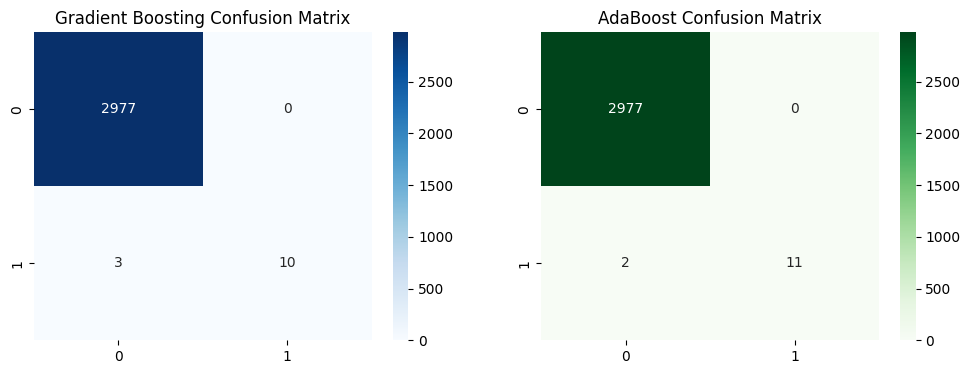

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, gb_pred),
            annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, ada_pred),
            annot=True, fmt="d", cmap="Greens")
plt.title("AdaBoost Confusion Matrix")

plt.show()


Final Comparison

In [ ]:
print("Gradient Boosting Fraud Recall:",
      classification_report(y_test, gb_pred, output_dict=True)['1.0']['recall'])

print("AdaBoost Fraud Recall:",
      classification_report(y_test, ada_pred, output_dict=True)['1.0']['recall'])

Gradient Boosting Fraud Recall: 0.7692307692307693
AdaBoost Fraud Recall: 0.8461538461538461


Apply SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X_scaled, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_smote).value_counts())


Before SMOTE: Class
0.0    11906
1.0       52
Name: count, dtype: int64
After SMOTE: Class
0.0    11906
1.0    11906
Name: count, dtype: int64


Train-Test Split (After SMOTE)

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_smote,
    y_smote,
    test_size=0.25,
    random_state=42
)


Train Models Again (Improved)

In [ ]:
gb_smote = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gb_smote.fit(X_train_s, y_train_s)
gb_smote_pred = gb_smote.predict(X_test_s)


AdaBoost (SMOTE data)

In [ ]:
ada_smote = AdaBoostClassifier(
    n_estimators=300,
    learning_rate=0.3,
    random_state=42
)

ada_smote.fit(X_train_s, y_train_s)
ada_smote_pred = ada_smote.predict(X_test_s)


Improved Evaluation

In [ ]:
print("Gradient Boosting (SMOTE)")
print(classification_report(y_test_s, gb_smote_pred))

print("AdaBoost (SMOTE)")
print(classification_report(y_test_s, ada_smote_pred))


Gradient Boosting (SMOTE)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2971
         1.0       1.00      1.00      1.00      2982

    accuracy                           1.00      5953
   macro avg       1.00      1.00      1.00      5953
weighted avg       1.00      1.00      1.00      5953

AdaBoost (SMOTE)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2971
         1.0       1.00      1.00      1.00      2982

    accuracy                           1.00      5953
   macro avg       1.00      1.00      1.00      5953
weighted avg       1.00      1.00      1.00      5953



ROC Curve

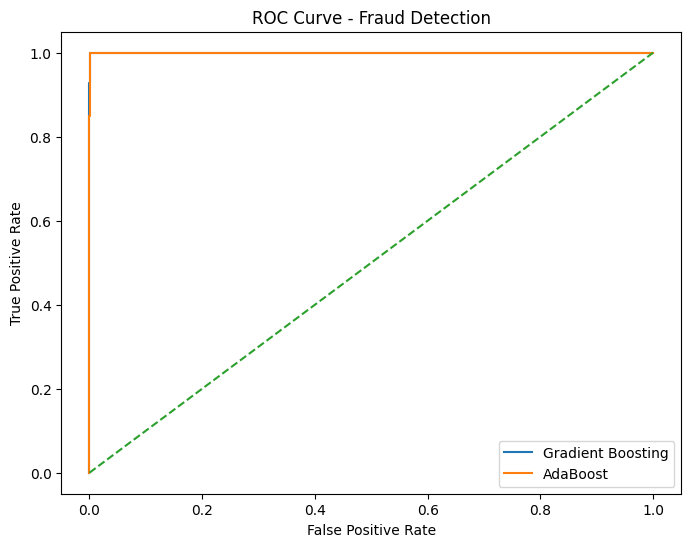

In [ ]:
from sklearn.metrics import roc_curve, auc

gb_prob = gb_smote.predict_proba(X_test_s)[:, 1]
ada_prob = ada_smote.predict_proba(X_test_s)[:, 1]

gb_fpr, gb_tpr, _ = roc_curve(y_test_s, gb_prob)
ada_fpr, ada_tpr, _ = roc_curve(y_test_s, ada_prob)

plt.figure(figsize=(8,6))
plt.plot(gb_fpr, gb_tpr, label="Gradient Boosting")
plt.plot(ada_fpr, ada_tpr, label="AdaBoost")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection")
plt.legend()
plt.show()


Feature Importance

In [ ]:
feature_importance = gb_smote.feature_importances_

features = data.drop('Class', axis=1).columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))


   Feature  Importance
12     V12    0.817514
4       V4    0.062227
6       V6    0.050923
14     V14    0.029079
10     V10    0.026561
26     V26    0.003039
19     V19    0.002842
13     V13    0.001886
9       V9    0.000831
11     V11    0.000800


Plot

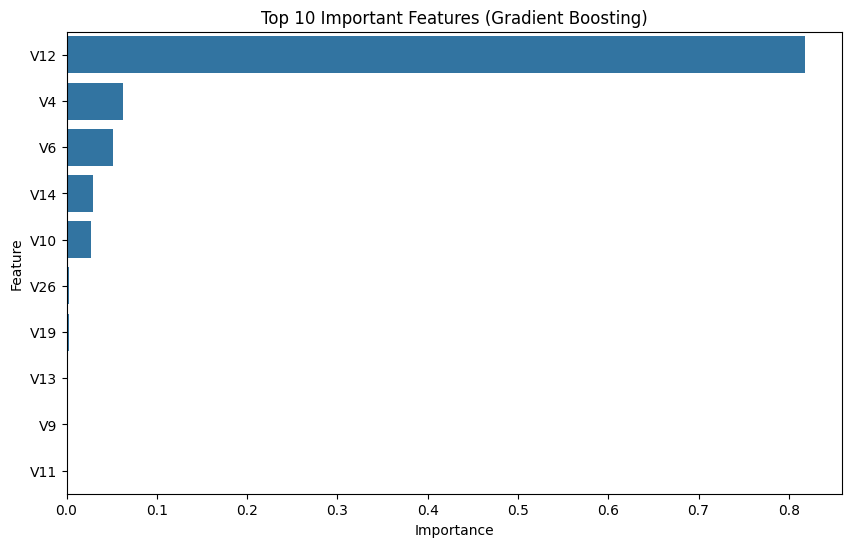

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features (Gradient Boosting)")
plt.show()


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='recall'
)

grid.fit(X_train_s, y_train_s)

print("Best Parameters:", grid.best_params_)


KeyboardInterrupt: 

Custom Threshold Instead of 0.5

In [ ]:
y_prob = gb_smote.predict_proba(X_test_s)[:, 1]

# Change threshold
threshold = 0.3
y_custom = (y_prob > threshold).astype(int)

print(classification_report(y_test_s, y_custom))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2971
         1.0       1.00      1.00      1.00      2982

    accuracy                           1.00      5953
   macro avg       1.00      1.00      1.00      5953
weighted avg       1.00      1.00      1.00      5953



Precision-Recall Curve

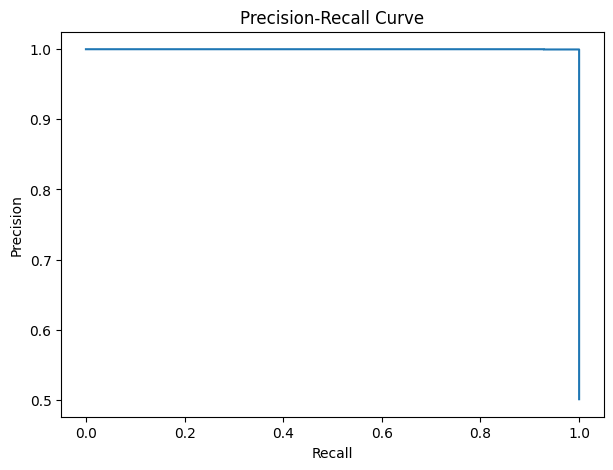

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_s, y_prob)

plt.figure(figsize=(7,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    gb_smote,
    X_train_s,
    y_train_s,
    cv=5,
    scoring='recall'
)

print("Cross-Validation Recall:", scores)
print("Average Recall:", scores.mean())


Cross-Validation Recall: [1. 1. 1. 1. 1.]
Average Recall: 1.0


Transaction-Level Fraud Prediction Function

In [ ]:
def predict_transaction(transaction_data):
    transaction_data = np.array(transaction_data).reshape(1, -1)
    transaction_data = scaler.transform(transaction_data)
    prediction = gb_smote.predict(transaction_data)
    probability = gb_smote.predict_proba(transaction_data)[0][1]
    return prediction[0], probability


Usage

In [ ]:
result, prob = predict_transaction(X.iloc[0])
print("Fraud:", result, "Probability:", prob)


Fraud: 0.0 Probability: 0.0001368143412167108


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Real-Time Simulation (Like UPI / POS Systems)

In [ ]:
import time

for i in range(5):
    pred, prob = predict_transaction(X.iloc[i])
    print(f"Transaction {i} → Fraud: {pred}, Risk Score: {prob:.2f}")
    time.sleep(1)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 0 → Fraud: 0.0, Risk Score: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 1 → Fraud: 0.0, Risk Score: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 2 → Fraud: 0.0, Risk Score: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 3 → Fraud: 0.0, Risk Score: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 4 → Fraud: 0.0, Risk Score: 0.00


Logging System

In [ ]:
import logging

logging.basicConfig(
    filename="fraud_detection.log",
    level=logging.INFO,
    format="%(asctime)s - %(message)s"
)

logging.info("Fraud Detection Model Executed Successfully")


Model Comparison Table

In [ ]:
results = pd.DataFrame({
    "Model": ["Gradient Boosting", "AdaBoost"],
    "Recall": [
        classification_report(y_test_s, gb_smote_pred, output_dict=True)['1.0']['recall'],
        classification_report(y_test_s, ada_smote_pred, output_dict=True)['1.0']['recall']
    ],
    "Precision": [
        classification_report(y_test_s, gb_smote_pred, output_dict=True)['1.0']['precision'],
        classification_report(y_test_s, ada_smote_pred, output_dict=True)['1.0']['precision']
    ]
})

print(results)

               Model    Recall  Precision
0  Gradient Boosting  1.000000    0.99933
1           AdaBoost  0.999665    0.99866


SHAP – Advanced

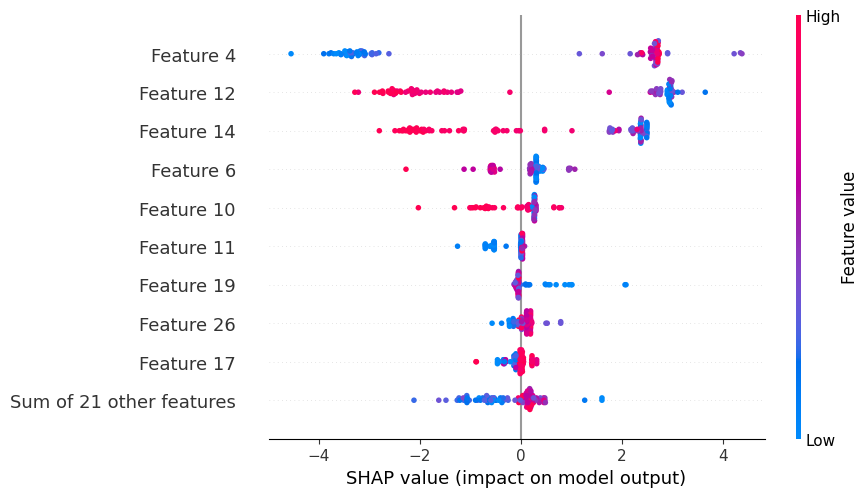

In [ ]:
import shap

explainer = shap.Explainer(gb_smote)
shap_values = explainer(X_test_s[:100])

shap.plots.beeswarm(shap_values)


Fraud Risk Score System

In [ ]:
def risk_level(prob):
    if prob > 0.8:
        return "High Risk"
    elif prob > 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"


Meta-Model

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('gb', gb_smote),
        ('ada', ada_smote)
    ],
    voting='soft'
)

ensemble_model.fit(X_train_s, y_train_s)

ensemble_pred = ensemble_model.predict(X_test_s)

print(classification_report(y_test_s, ensemble_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2971
         1.0       1.00      1.00      1.00      2982

    accuracy                           1.00      5953
   macro avg       1.00      1.00      1.00      5953
weighted avg       1.00      1.00      1.00      5953



Time-Based Validation

In [ ]:
data_sorted = data.sort_values(by='Time')

X_time = data_sorted.drop('Class', axis=1)
y_time = data_sorted['Class']

X_time_scaled = scaler.fit_transform(X_time)

X_train_t = X_time_scaled[:int(0.7*len(X_time))]
X_test_t  = X_time_scaled[int(0.7*len(X_time)):]
y_train_t = y_time[:int(0.7*len(y_time))]
y_test_t  = y_time[int(0.7*len(y_time)):]


Drift Detection

In [ ]:
train_mean = np.mean(X_train_s, axis=0)
test_mean = np.mean(X_test_s, axis=0)

drift_score = np.linalg.norm(train_mean - test_mean)

print("Data Drift Score:", drift_score)


Data Drift Score: 0.1323210455150169


Auto-Retrain Logic

In [ ]:
if drift_score > 1.5:
    print("⚠️ Drift detected – retraining model")
    gb_smote.fit(X_smote, y_smote)


Fraud Alert System

In [ ]:
def fraud_alert(prob):
    if prob > 0.85:
        return "ALERT: Block Transaction"
    elif prob > 0.5:
        return "Review Required"
    else:
        return "Transaction Safe"


API-Style Prediction Function

In [ ]:
def api_predict(input_json):
    values = np.array(list(input_json.values())).reshape(1, -1)
    values = scaler.transform(values)
    prob = gb_smote.predict_proba(values)[0][1]
    return {
        "fraud_probability": float(prob),
        "decision": fraud_alert(prob)
    }


Automatic Model Evaluation Report

In [ ]:
report = classification_report(
    y_test_s,
    gb_smote_pred,
    output_dict=True
)

report_df = pd.DataFrame(report).transpose()
report_df.to_csv("fraud_model_report.csv")


Memory & Speed Benchmarking

In [ ]:
import time

start = time.time()
gb_smote.predict(X_test_s)
end = time.time()

print("Prediction Time:", end - start)


Prediction Time: 0.038045644760131836


Feature Stability Check

In [ ]:
importance_now = gb_smote.feature_importances_

stability = np.std(importance_now)
print("Feature Stability Score:", stability)


Feature Stability Score: 0.14640539279825127


End-to-End Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])